In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
train_path = '/content/gdrive/My Drive/Colab Notebooks/SMAI/Assignment 1/Datasets/q1/train.csv'
test_path = '/content/gdrive/My Drive/Colab Notebooks/SMAI/Assignment 1/Datasets/q1/test.csv'
test_labels_path = '/content/gdrive/My Drive/Colab Notebooks/SMAI/Assignment 1/Datasets/q1/test_labels.csv'

In [0]:
import pandas as pd
import numpy as np
from pprint import pprint

In [0]:
df_train = pd.read_csv(train_path, header=None)
print(df_train.shape)
df_train.head()

(20000, 785)


0    1    2    3    4    5    6    ...  778  779  780  781  782  783  784
0    1    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
1    2    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
2    6    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
3    5    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
4    3    0    0    0    0    0    0  ...    0    0    0    0    0    0    0

[5 rows x 785 columns]

In [0]:
class KNNClassifier(object):
    def __init__(self, k=7, p=2):
        self.df_train = self.df_test = self.shape = None
        self.k = k
        self.p = p

    def train(self, train_path = ''):
        try:
            self.df_train = pd.read_csv(train_path, header=None)
        except:
            print('Invalid train data path')
            exit(-1)
        self.df_train_x = self.df_train.values[:,1:]
        self.df_train_y = self.df_train.values[:,:1]
        self.shape = self.df_train_x.shape
        del self.df_train

    def lpnorm(self, test_instance):
        '''
        Lp norm calculates lp distance where p > 0
        '''
        return np.abs(np.float_power((self.df_train_x - test_instance), self.p)).sum(axis=1)

    def get_k_nearest_neighbours(self, test_instance):
        '''
        Function Returns the nearest neighest of the set avaliable based on the k value
        '''
        '''argpartition returns the ind of nearest elements, bincount forms histogram till largest value and argmax returns the highest peat in histogram'''
        from scipy import stats
        # print(stats.mode(self.df_train_y[np.argsort(np.array(self.lpnorm(test_instance)))[:self.k]][:,0])[0][0]) 
        # input()
        return stats.mode(self.df_train_y[np.argsort(np.array(self.lpnorm(test_instance)))[:self.k]][:,0])[0][0]

    def predict(self, test_path=''):
        try:
            self.df_test = pd.read_csv(test_path, header=None)
        except:
            print('Invalid test Data path')
            exit(-1)
        df_test_x = self.df_test[:].values
        del self.df_test
        predicted_result = []
        for test_instance in df_test_x:
            predicted_result.append(self.get_k_nearest_neighbours(test_instance))
        return predicted_result

## Accurancy Metrics

####Precision 

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

`Precision = TP/TP+FP`

####Recall (Sensitivity)

Recall is the ratio of correctly predicted positive observations to the all observations in actual class 

`Recall = TP/TP+FN`

####F1 score

F1 Score is the weighted average of Precision and Recall.

`F1 Score = 2*(Recall * Precision) / (Recall + Precision)`

[source](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)

In [0]:
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, confusion_matrix
'''
Different values of k
'''
k_metrics = []
for k in [3,5,7]:
    knn_classifier = KNNClassifier(k=k)
    knn_classifier.train(train_path)
    predictions = knn_classifier.predict(test_path)
    test_labels = list()
    with open(test_labels_path) as f:
        for line in f:
            test_labels.append(int(line))
           
    print('K value', k)
    from sklearn.metrics import precision_recall_fscore_support as score
    precision, recall, fscore, support = score(test_labels, predictions)
    k_metrics.append(list([precision, recall, fscore, support]))
    print('precision'.rjust(10),*[str(i).rjust(20) for i in  list(precision)], sep='\t|\t')
    print('recall'.rjust(10),*[str(i).rjust(20) for i in  list(recall)], sep='\t|\t')
    print('fscore'.rjust(10),*[str(i).rjust(20) for i in  list(fscore)], sep='\t|\t')
    print('support'.rjust(10),*[str(i).rjust(20) for i in  list(support)], sep = '\t|\t')
    print('\n\n')

K value 3
 precision	|	             0.96875	|	  0.9711538461538461	|	   0.963963963963964	|	  0.9727272727272728	|	  0.9764705882352941	|	  0.9634146341463414	|	  0.9711538461538461	|	  0.9797979797979798	|	  0.9893617021276596	|	  0.9217391304347826
    recall	|	  0.9893617021276596	|	                 1.0	|	  0.9907407407407407	|	  0.9907407407407407	|	  0.9120879120879121	|	  0.9753086419753086	|	                 1.0	|	  0.9326923076923077	|	                0.93	|	  0.9464285714285714
    fscore	|	  0.9789473684210526	|	  0.9853658536585366	|	  0.9771689497716894	|	   0.981651376146789	|	  0.9431818181818181	|	  0.9693251533742332	|	  0.9853658536585366	|	  0.9556650246305419	|	  0.9587628865979382	|	  0.9339207048458149
   support	|	                  94	|	                 101	|	                 108	|	                 108	|	                  91	|	                  81	|	                 101	|	                 104	|	                 100	|	                 112



K value 5
 precision	|	

In [0]:
'''
differnt p values for eucledian and etc
'''
p_metrics = []
for p in [2,3,5]:
    knn_classifier = KNNClassifier(p=p)
    knn_classifier.train(train_path)
    predictions = knn_classifier.predict(test_path)
    test_labels = list()
    with open(test_labels_path) as f:
        for line in f:
            test_labels.append(int(line))
    print('p value for lp space', p)
    from sklearn.metrics import precision_recall_fscore_support as score
    precision, recall, fscore, support = score(test_labels, predictions)
    p_metrics.append(list([precision, recall, fscore, support]))
    print('precision'.rjust(10),*[str(i).rjust(20) for i in  list(precision)], sep='\t|\t')
    print('recall'.rjust(10),*[str(i).rjust(20) for i in  list(recall)], sep='\t|\t')
    print('fscore'.rjust(10),*[str(i).rjust(20) for i in  list(fscore)], sep='\t|\t')
    print('support'.rjust(10),*[str(i).rjust(20) for i in  list(support)], sep = '\t|\t')
    print('\n\n')

p value for lp space 2
 precision	|	  0.9690721649484536	|	  0.9523809523809523	|	  0.9545454545454546	|	  0.9553571428571429	|	  0.9764705882352941	|	  0.9518072289156626	|	  0.9901960784313726	|	  0.9595959595959596	|	  0.9893617021276596	|	  0.9292035398230089
    recall	|	                 1.0	|	  0.9900990099009901	|	  0.9722222222222222	|	  0.9907407407407407	|	  0.9120879120879121	|	  0.9753086419753086	|	                 1.0	|	  0.9134615384615384	|	                0.93	|	              0.9375
    fscore	|	  0.9842931937172774	|	   0.970873786407767	|	   0.963302752293578	|	  0.9727272727272727	|	  0.9431818181818181	|	  0.9634146341463414	|	  0.9950738916256158	|	  0.9359605911330049	|	  0.9587628865979382	|	  0.9333333333333333
   support	|	                  94	|	                 101	|	                 108	|	                 108	|	                  91	|	                  81	|	                 101	|	                 104	|	                 100	|	                 112



p value fo

####Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.


In [0]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_labels, predictions))

[[ 92   0   0   0   0   1   1   0   0   0]
 [  0 100   0   1   0   0   0   0   0   0]
 [  0   0 105   1   0   0   0   2   0   0]
 [  0   0   0 105   0   2   0   0   0   1]
 [  0   1   0   0  83   0   1   1   0   5]
 [  0   0   0   1   0  79   0   0   1   0]
 [  0   0   0   0   1   0 100   0   0   0]
 [  0   4   1   0   1   0   0  95   0   3]
 [  1   0   1   3   0   2   0   1  92   0]
 [  1   0   1   0   1   1   0   2   1 105]]


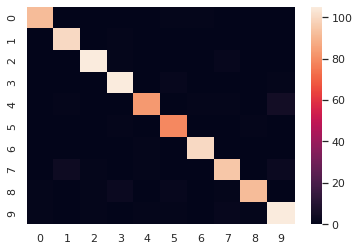

In [0]:
import seaborn as sns; sns.set()
ax = sns.heatmap(confusion_matrix(test_labels, predictions))

###Compare with sklearn Knn

In [0]:
from sklearn.neighbors import KNeighborsClassifier

df_train = pd.read_csv(train_path, header=None)
df_train_x = df_train.values[:,1:]
df_train_y = df_train.values[:,:1]
knn = KNeighborsClassifier(n_neighbors=5)


df_test = pd.read_csv(test_path, header=None)
df_test_x = df_test[:].values
knn.fit(df_train_x, df_train_y)
predictions = []
for i in df_test_x:
    i = i.reshape(1, -1)
    predictions.append(knn.predict(i))
predictions = np.array(predictions).reshape(1,-1)[0]
from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score
print('sklearn KNN results at k = 5 and p = 2')
precision, recall, fscore, support = score(test_labels, predictions)
print('precision'.rjust(10),*[str(i).rjust(20) for i in  list(precision)], sep='\t|\t')
print('recall'.rjust(10),*[str(i).rjust(20) for i in  list(recall)], sep='\t|\t')
print('fscore'.rjust(10),*[str(i).rjust(20) for i in  list(fscore)], sep='\t|\t')
print('support'.rjust(10),*[str(i).rjust(20) for i in  list(support)], sep = '\t|\t')

print('skLearn KNN accuracy ', accuracy_score(test_labels, predictions))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


sklearn KNN results at k = 5 and p = 2
 precision	|	  0.9789473684210527	|	  0.9433962264150944	|	   0.963302752293578	|	  0.9553571428571429	|	  0.9764705882352941	|	  0.9397590361445783	|	  0.9805825242718447	|	  0.9595959595959596	|	  0.9893617021276596	|	  0.9298245614035088
    recall	|	  0.9893617021276596	|	  0.9900990099009901	|	  0.9722222222222222	|	  0.9907407407407407	|	  0.9120879120879121	|	  0.9629629629629629	|	                 1.0	|	  0.9134615384615384	|	                0.93	|	  0.9464285714285714
    fscore	|	  0.9841269841269842	|	   0.966183574879227	|	  0.9677419354838711	|	  0.9727272727272727	|	  0.9431818181818181	|	  0.9512195121951219	|	  0.9901960784313726	|	  0.9359605911330049	|	  0.9587628865979382	|	  0.9380530973451328
   support	|	                  94	|	                 101	|	                 108	|	                 108	|	                  91	|	                  81	|	                 101	|	                 104	|	                 100	|	                 1

In [0]:
knn_classifier = KNNClassifier(k=5)
knn_classifier.train(train_path)
our_predictions = knn_classifier.predict(test_path)
        
from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score
print('Our KNN results at k = 5 and p = 2')
precision, recall, fscore, support = score(test_labels, our_predictions)
print('precision'.rjust(10),*[str(i).rjust(20) for i in  list(precision)], sep='\t|\t')
print('recall'.rjust(10),*[str(i).rjust(20) for i in  list(recall)], sep='\t|\t')
print('fscore'.rjust(10),*[str(i).rjust(20) for i in  list(fscore)], sep='\t|\t')
print('support'.rjust(10),*[str(i).rjust(20) for i in  list(support)], sep = '\t|\t')


print('Our KNN accuracy ', accuracy_score(test_labels, our_predictions))

Our KNN results at k = 5 and p = 2
 precision	|	  0.9789473684210527	|	  0.9433962264150944	|	   0.963302752293578	|	  0.9553571428571429	|	  0.9764705882352941	|	  0.9397590361445783	|	  0.9805825242718447	|	  0.9595959595959596	|	  0.9893617021276596	|	  0.9298245614035088
    recall	|	  0.9893617021276596	|	  0.9900990099009901	|	  0.9722222222222222	|	  0.9907407407407407	|	  0.9120879120879121	|	  0.9629629629629629	|	                 1.0	|	  0.9134615384615384	|	                0.93	|	  0.9464285714285714
    fscore	|	  0.9841269841269842	|	   0.966183574879227	|	  0.9677419354838711	|	  0.9727272727272727	|	  0.9431818181818181	|	  0.9512195121951219	|	  0.9901960784313726	|	  0.9359605911330049	|	  0.9587628865979382	|	  0.9380530973451328
   support	|	                  94	|	                 101	|	                 108	|	                 108	|	                  91	|	                  81	|	                 101	|	                 104	|	                 100	|	                 112
O

In [0]:
print(confusion_matrix(test_labels, our_predictions))

[[ 93   0   0   0   0   0   1   0   0   0]
 [  0 100   0   1   0   0   0   0   0   0]
 [  0   0 105   1   0   0   0   2   0   0]
 [  0   0   0 107   0   1   0   0   0   0]
 [  0   1   0   0  83   0   1   1   0   5]
 [  0   1   0   1   0  78   0   0   1   0]
 [  0   0   0   0   0   0 101   0   0   0]
 [  0   4   1   0   1   0   0  95   0   3]
 [  1   0   2   2   0   2   0   0  93   0]
 [  1   0   1   0   1   2   0   1   0 106]]
